In [ ]:
!pip install geedim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 537.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 17.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install geopandas

In [ ]:
import geedim
import geemap
import geopandas as gpd
import ee
import shapely.geometry as sg
import geopandas as gpd

In [ ]:
geemap.ee_initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=NVhTJV5KhWqBTSoiWBwlZoTF5Yl84UmmdGnPaGTlRbY&tc=XeO9QmN7rbt8OKHkKZWgTVrRw3A3AExwS5vsljqB7eE&cc=dSA-Hfm5X4qCM7ufGuzu2-4IMf71GcdTY5v9_zn7_78

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AeaYSHCjEDf9NpNvjM6B5i8YeqhEhVDMn3Ark_subTUn0-rUjJE5D48S6iw

Successfully saved authorization token.


In [ ]:
!pwd

/content


In [ ]:
gdf_aoi = gpd.read_file("mozambique_EPSG3857.shp")
gdf_aoi.head()

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,ADM0ALT1PT,ADM0ALT2PT,date,validOn,validTo,geometry
0,96.656088,67.039658,Mozambique,Moçambique,MZ,Mocambique,None,None,None,None,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((3672979.894 -2995480.076, 3672..."


<Axes: >

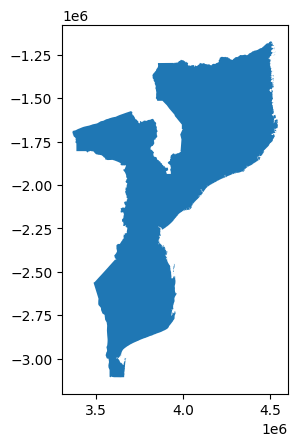

In [ ]:
gdf_aoi.plot()

In [ ]:
ee_aoi = geemap.geopandas_to_ee(gdf_aoi)

Set Cell Size in Meter

In [ ]:
cell_size = 30

**GLO 30 DEM**

In [ ]:
dataset = ee.ImageCollection("projects/sat-io/open-datasets/GLO-30").mosaic(); # for ImageCollection
dataset = dataset.clip(ee_aoi)
geemap.download_ee_image(
            dataset,
            scale=cell_size,
            filename='/content/GLO30_DEM.tif',
            dtype='float32',
            region=ee_aoi.geometry(),
            crs='EPSG:3857'
        )

GLO30_DEM.tif: |          | 0.00/74.2M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None


**GLOBathy**

In [ ]:
dataset = ee.Image("projects/sat-io/open-datasets/GLOBathy/GLOBathy_bathymetry")
dataset = dataset.clip(ee_aoi)
geemap.download_ee_image(
            dataset,
            scale=cell_size,
            filename='/content/GLOBathy.tif',
            dtype='float32',
            region=ee_aoi.geometry(),
            crs='EPSG:3857'
        )

GLOBathy.tif: |          | 0.00/74.2M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/sat-io/open-datasets/GLOBathy/GLOBathy_bathymetry


**GHI**

In [ ]:
# Daily GHI
dataset = ee.Image("projects/earthengine-legacy/assets/projects/sat-io/open-datasets/global_solar_atlas/ghi_LTAy_AvgDailyTotals")
dataset = dataset.clip(ee_aoi)

# geemap.download_ee_image(
#             dataset,
#             scale=cell_size,
#             filename='/content/GHI.tif',
#             dtype='float32',
#             region=ee_aoi.geometry(),
#             crs='EPSG:3857'
#         )


# Here, to convert to annual total, multiply by 365.
annual_dataset = dataset.multiply(365)

# Restricting the dataset to the clipped area
annual_dataset_clipped = annual_dataset.clip(ee_aoi)

# Downloading the resulting image
geemap.download_ee_image(
    annual_dataset_clipped,  # Using the dataset with applied operations
    scale=cell_size,
    filename='/content/GHI_annual.tif',
    dtype='float32',
    region=ee_aoi.geometry(),
    crs='EPSG:3857'
)

GHI_annual.tif: |          | 0.00/74.2M (raw) [  0.0%] in 00:00 (eta:     ?)

**Wind Speed**

In [ ]:
imageCollection = ee.ImageCollection("projects/earthengine-legacy/assets/projects/sat-io/open-datasets/global_wind_atlas/wind-speed"); # for ImageCollection
imageList = imageCollection.toList(imageCollection.size())
dataset = ee.Image(imageList.get(1))

dataset = dataset.clip(ee_aoi)
geemap.download_ee_image(
            dataset,
            scale=cell_size,
            filename='/content/wind_speed_10m_height.tif',
            dtype='float32',
            region=ee_aoi.geometry(),
            crs='EPSG:3857'
        )

wind_speed_10m_height.tif: |          | 0.00/74.2M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: projects/sat-io/open-datasets/global_wind_atlas/wind-speed/gwa3_250_wind-speed_10m


**Land Cover**

In [ ]:
dataset = ee.ImageCollection("projects/sat-io/open-datasets/landcover/ESRI_Global-LULC_10m_TS").mosaic(); # for ImageCollection
dataset = dataset.clip(ee_aoi)
geemap.download_ee_image(
            dataset,
            scale=cell_size,
            filename='/content/land_cover.tif',
            dtype='float32',
            region=ee_aoi.geometry(),
            crs='EPSG:3857'
        )

land_cover.tif: |          | 0.00/74.2M (raw) [  0.0%] in 00:00 (eta:     ?)

**Electrical Grid**

In [ ]:
dataset = ee.FeatureCollection("projects/sat-io/open-datasets/predictive-global-power-system/distribution-transmission-lines"); # for FeatureCollection
clipped_dataset = dataset.filterBounds(ee_aoi)
geemap.ee_export_vector(clipped_dataset, '/content/electrical_grid.geojson')

Generating URL ...
Please wait ...
Data downloaded to /content/electrical_grid.geojson


EEException: Element.propertyNames: Parameter 'element' is required.

**Roads**

In [ ]:
dataset_AF = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/Africa"); # for FeatureCollection
dataset_CSA = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/Central-South-America"); # for FeatureCollection
dataset_EU = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/Europe"); # for FeatureCollection
dataset_NA = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/North-America"); # for FeatureCollection
dataset_OC = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/Oceania"); # for FeatureCollection
dataset_SEA = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/South-East-Asia"); # for FeatureCollection
dataset_MECA = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/Middle-East-Central-Asia"); # for FeatureCollection

clipped_dataset_AF = dataset_AF.filterBounds(ee_aoi)
clipped_dataset_CSA = dataset_CSA.filterBounds(ee_aoi)
clipped_dataset_EU = dataset_EU.filterBounds(ee_aoi)
clipped_dataset_NA = dataset_NA.filterBounds(ee_aoi)
clipped_dataset_OC = dataset_OC.filterBounds(ee_aoi)
clipped_dataset_SEA = dataset_SEA.filterBounds(ee_aoi)
clipped_dataset_MECA = dataset_MECA.filterBounds(ee_aoi)

merged_dataset = (
    clipped_dataset_AF
    .merge(clipped_dataset_CSA)
    .merge(clipped_dataset_EU)
    .merge(clipped_dataset_NA)
    .merge(clipped_dataset_OC)
    .merge(clipped_dataset_SEA)
    .merge(clipped_dataset_MECA)
)

geemap.ee_export_vector(merged_dataset, '/content/roads.geojson')

Generating URL ...
Please wait ...
Data downloaded to /content/roads.geojson
